In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime, timedelta
import backtrader as bt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyfolio as pf
import quantstats
import math
import seaborn
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

C:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
# ETH starts: 2015-08-07
start = datetime(2015,9,2)
end = datetime(2021,5,31)

tickers = ['SPY','IEF','TLT','IAU','DBC']
cryptos = ['BTC-USD','ETH-USD']

def get_price_data(tickers):
    df_asset = pd.DataFrame(columns=tickers)
    
    for ticker in tickers:
        df_asset[ticker] = pdr.get_data_yahoo(ticker, start, end)['Adj Close']  
         
    return df_asset

In [3]:
df_asset = get_price_data(tickers)
df_asset

,SPY,IEF,TLT,IAU,DBC
Date,,,,,
2015-09-01,171.627823,96.570412,107.299332,22.040001,14.739373
2015-09-02,174.885483,96.307831,106.376060,21.900000,14.865684
2015-09-03,175.010788,96.543259,106.894859,21.760000,14.962844
2015-09-04,172.361679,96.841980,107.870850,21.660000,14.778238
2015-09-08,176.693329,96.416519,106.279373,21.680000,14.885116
...,...,...,...,...,...
2021-05-24,419.170013,114.241051,137.981369,35.880001,18.400000
2021-05-25,418.239990,114.660759,139.259537,36.200001,18.340000
2021-05-26,419.070007,114.530853,139.019882,36.139999,18.370001


암호화폐는 24시간 거래라서 매일 시세가 있습니다. 그래서 데이터를 따로 받았습니다. 월간 리밸런싱을 가정할 것이라서 문제는 없습니다.

In [4]:
df_crypto = get_price_data(cryptos)
df_crypto

,BTC-USD,ETH-USD
Date,,
2015-08-31,228.121002,1.351610
2015-09-01,229.283997,1.294790
2015-09-02,227.182999,1.264930
2015-09-03,230.298004,1.274410
2015-09-04,235.018997,1.338810
...,...,...
2021-05-26,38436.968750,2736.488525
2021-05-27,35697.605469,2419.906250
2021-05-28,34616.066406,2279.514160


In [5]:
df_asset = df_asset.resample(rule='M').last()
df_asset

,SPY,IEF,TLT,IAU,DBC
Date,,,,,
2015-09-30,172.394135,97.656815,108.627060,21.559999,14.719940
2015-10-31,187.057922,97.034790,108.182953,22.040001,14.768521
2015-11-30,187.741653,96.619804,107.244293,20.559999,13.787192
2015-12-31,184.496979,96.182068,106.925644,20.459999,12.980753
2016-01-31,175.311539,99.388466,112.884628,21.559999,12.417217
...,...,...,...,...,...
2021-01-31,368.861908,118.258263,150.995331,35.099998,15.190000
2021-02-28,379.118286,115.463448,142.338852,32.880001,16.730000
2021-03-31,396.329987,112.708855,134.872787,32.520000,16.610001


암호화폐에 8월 31일 시세까지 붙어서 들어오니 그것만 잘라 줍니다.

In [6]:
df_crypto = df_crypto.iloc[1:]
df_crypto = df_crypto.resample(rule='M').last()
df_crypto

,BTC-USD,ETH-USD
Date,,
2015-09-30,237.548996,0.690215
2015-10-31,314.165985,0.916627
2015-11-30,377.321014,0.873119
2015-12-31,430.566986,0.933542
2016-01-31,368.766998,2.306040
...,...,...
2021-01-31,33114.359375,1314.986206
2021-02-28,45137.769531,1416.048950
2021-03-31,59095.808594,1977.276855


각각의 수익률을 계산합니다.

In [7]:
return_col = [ticker + '_r' for ticker in tickers]
df_asset[return_col] = df_asset[tickers].pct_change()
df_asset

,SPY,IEF,TLT,IAU,DBC,SPY_r,IEF_r,TLT_r,IAU_r,DBC_r
Date,,,,,,,,,,
2015-09-30,172.394135,97.656815,108.627060,21.559999,14.719940,NaN,NaN,NaN,NaN,NaN
2015-10-31,187.057922,97.034790,108.182953,22.040001,14.768521,0.085060,-0.006369,-0.004088,0.022264,0.003300
2015-11-30,187.741653,96.619804,107.244293,20.559999,13.787192,0.003655,-0.004277,-0.008677,-0.067151,-0.066447
2015-12-31,184.496979,96.182068,106.925644,20.459999,12.980753,-0.017283,-0.004531,-0.002971,-0.004864,-0.058492
2016-01-31,175.311539,99.388466,112.884628,21.559999,12.417217,-0.049786,0.033337,0.055730,0.053763,-0.043413
...,...,...,...,...,...,...,...,...,...,...
2021-01-31,368.861908,118.258263,150.995331,35.099998,15.190000,-0.010190,-0.010921,-0.036328,-0.031991,0.033333
2021-02-28,379.118286,115.463448,142.338852,32.880001,16.730000,0.027805,-0.023633,-0.057329,-0.063248,0.101382
2021-03-31,396.329987,112.708855,134.872787,32.520000,16.610001,0.045399,-0.023857,-0.052453,-0.010949,-0.007173


In [8]:
return_col = [crypto + '_r' for crypto in cryptos]
df_crypto[return_col] = df_crypto[cryptos].pct_change()
df_crypto

,BTC-USD,ETH-USD,BTC-USD_r,ETH-USD_r
Date,,,,
2015-09-30,237.548996,0.690215,NaN,NaN
2015-10-31,314.165985,0.916627,0.322531,0.328031
2015-11-30,377.321014,0.873119,0.201024,-0.047465
2015-12-31,430.566986,0.933542,0.141116,0.069204
2016-01-31,368.766998,2.306040,-0.143532,1.470205
...,...,...,...,...
2021-01-31,33114.359375,1314.986206,0.141807,0.782299
2021-02-28,45137.769531,1416.048950,0.363088,0.076855
2021-03-31,59095.808594,1977.276855,0.309232,0.396334


월별 전략 수익률을 구합니다. 논문에서 제시한 비율인 1%, 1.5%, 3%, 6%로 테스트해 봅니다. All Seasons 전략 99%와 비트코인 0.5%, 이더리움 0.5%가 1번 전략, All Seasons 전략 98.5%와 비트코인 0.75%, 이더리움 0.75%가 2번 전략, All Seasons 전략 97%와 비트코인 1.5%, 이더리움 1.5%가 3번 전략, All Seasons 전략 94%와 비트코인 3%, 이더리움 3%가 4번 전략입니다.

In [35]:
df_port_return = pd.DataFrame(index = df_asset.index)
df_port_return['Port1'] = (df_asset['SPY_r']*0.3+df_asset['IEF_r']*0.15+df_asset['TLT_r']*0.4+df_asset['IAU_r']*0.075+df_asset['DBC_r']*0.075)*0.99 + df_crypto['BTC-USD_r']*0.005 + df_crypto['ETH-USD_r']*0.005
df_port_return['Port2'] = (df_asset['SPY_r']*0.3+df_asset['IEF_r']*0.15+df_asset['TLT_r']*0.4+df_asset['IAU_r']*0.075+df_asset['DBC_r']*0.075)*0.985 + df_crypto['BTC-USD_r']*0.0075 + df_crypto['ETH-USD_r']*0.0075
df_port_return['Port3'] = (df_asset['SPY_r']*0.3+df_asset['IEF_r']*0.15+df_asset['TLT_r']*0.4+df_asset['IAU_r']*0.075+df_asset['DBC_r']*0.075)*0.97 + df_crypto['BTC-USD_r']*0.015 + df_crypto['ETH-USD_r']*0.015
df_port_return['Port4'] = (df_asset['SPY_r']*0.3+df_asset['IEF_r']*0.15+df_asset['TLT_r']*0.4+df_asset['IAU_r']*0.075+df_asset['DBC_r']*0.075)*0.94 + df_crypto['BTC-USD_r']*0.03 + df_crypto['ETH-USD_r']*0.03
df_port_return

,Port1,Port2,Port3,Port4
Date,,,,
2015-09-30,NaN,NaN,NaN,NaN
2015-10-31,0.027849,0.029351,0.033858,0.042871
2015-11-30,-0.012137,-0.011688,-0.010341,-0.007647
2015-12-31,-0.010635,-0.010050,-0.008296,-0.004787
2016-01-31,0.019635,0.022886,0.032639,0.052145
...,...,...,...,...
2021-01-31,-0.014314,-0.011908,-0.004690,0.009745
2021-02-28,-0.012923,-0.011746,-0.008218,-0.001160
2021-03-31,-0.008648,-0.006823,-0.001347,0.009606


In [36]:
quantstats.stats.sharpe(df_port_return['Port1'])/math.sqrt(252/12)

1.4994160765130293

In [48]:
quantstats.stats.volatility(df_port_return['Port1'])/math.sqrt(252/12)

0.06927967434378487

In [37]:
quantstats.stats.sharpe(df_port_return['Port2'])/math.sqrt(252/12)

1.5826226129522614

In [49]:
quantstats.stats.volatility(df_port_return['Port2'])/math.sqrt(252/12)

0.07141218212835036

In [38]:
quantstats.stats.sharpe(df_port_return['Port3'])/math.sqrt(252/12)

1.7570711040520988

In [50]:
quantstats.stats.volatility(df_port_return['Port3'])/math.sqrt(252/12)

0.07992673963081208

In [39]:
quantstats.stats.sharpe(df_port_return['Port4'])/math.sqrt(252/12)

1.8865740182555468

In [51]:
quantstats.stats.volatility(df_port_return['Port4'])/math.sqrt(252/12)

0.10350711050635845

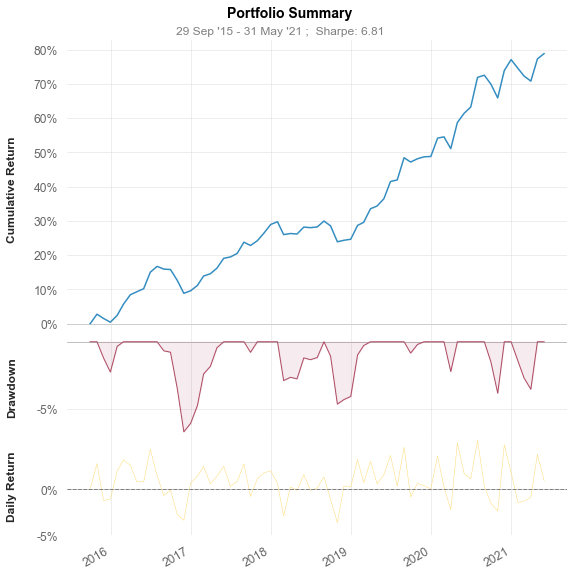

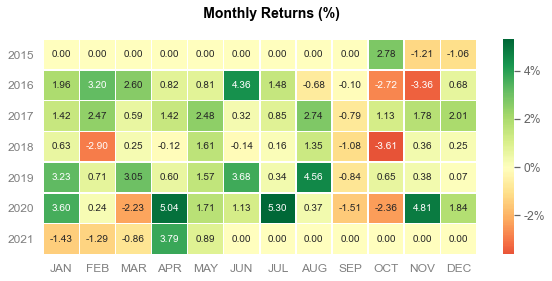

In [40]:
quantstats.reports.plots(df_port_return['Port1'], mode='basic')

In [41]:
quantstats.reports.metrics(df_port_return['Port1'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2015-09-30
End Period                 2021-05-31
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          78.85%
CAGR%                      10.8%
Sharpe                     6.87
Sortino                    14.37
Max Drawdown               -6.73%
Longest DD Days            273
Volatility (ann.)          31.75%
Calmar                     1.6
Skew                       0.08
Kurtosis                   -0.08

Expected Daily %           0.85%
Expected Monthly %         0.85%
Expected Yearly %          8.66%
Kelly Criterion            48.88%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.42%
Expected Shortfall (cVaR)  -2.42%

Payoff Ratio               1.21
Profit Factor              3.11
Common Sense Ratio         5.39
CPC Index                  2.7
Tail Ratio                 1.73
Outlier Win Ratio          2.91
Outlier Loss Ratio         2.31

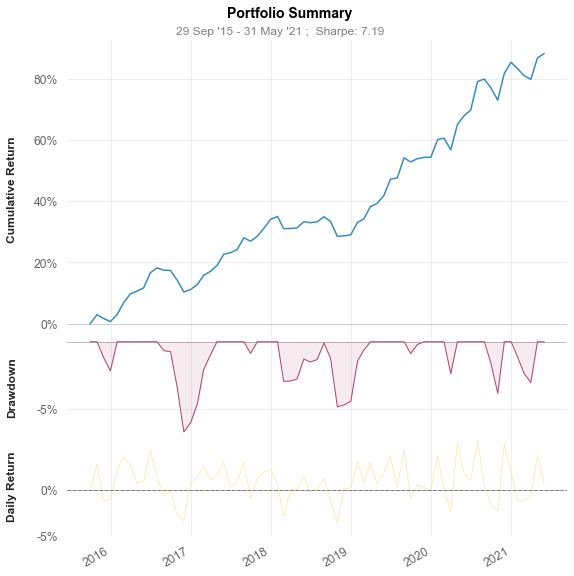

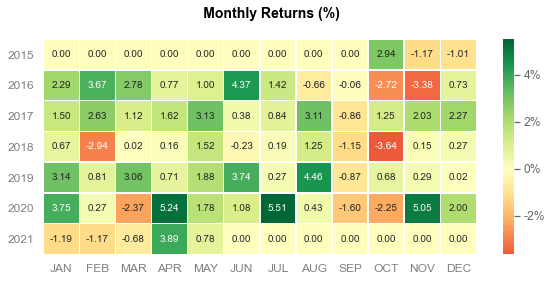

In [42]:
quantstats.reports.plots(df_port_return['Port2'], mode='basic')

In [43]:
quantstats.reports.metrics(df_port_return['Port2'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2015-09-30
End Period                 2021-05-31
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          88.26%
CAGR%                      11.8%
Sharpe                     7.25
Sortino                    15.65
Max Drawdown               -6.69%
Longest DD Days            396
Volatility (ann.)          32.73%
Calmar                     1.76
Skew                       0.08
Kurtosis                   -0.16

Expected Daily %           0.92%
Expected Monthly %         0.92%
Expected Yearly %          9.46%
Kelly Criterion            51.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.45%
Expected Shortfall (cVaR)  -2.45%

Payoff Ratio               1.2
Profit Factor              3.32
Common Sense Ratio         5.71
CPC Index                  2.92
Tail Ratio                 1.72
Outlier Win Ratio          2.92
Outlier Loss Ratio         2.2

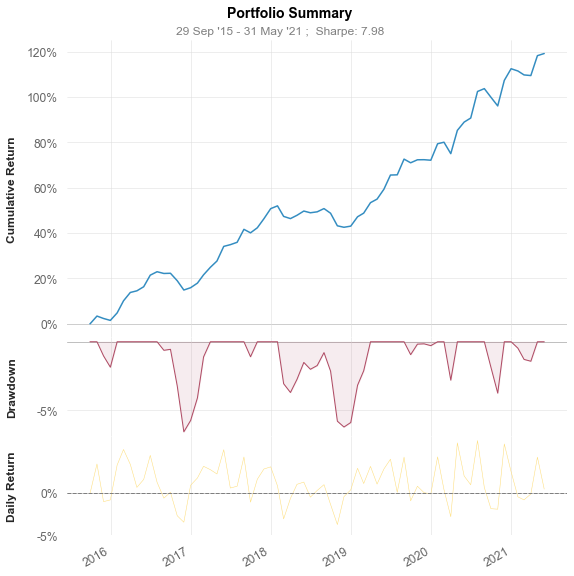

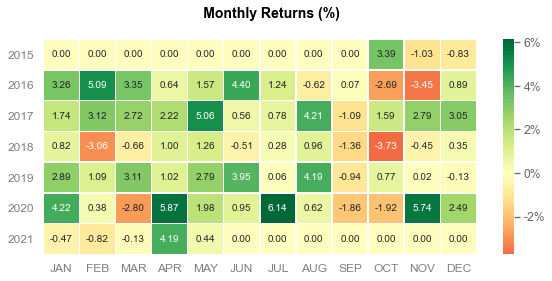

In [44]:
quantstats.reports.plots(df_port_return['Port3'], mode='basic')

In [45]:
quantstats.reports.metrics(df_port_return['Port3'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2015-09-30
End Period                 2021-05-31
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          119.28%
CAGR%                      14.85%
Sharpe                     8.05
Sortino                    19.09
Max Drawdown               -6.57%
Longest DD Days            396
Volatility (ann.)          36.63%
Calmar                     2.26
Skew                       0.13
Kurtosis                   -0.39

Expected Daily %           1.14%
Expected Monthly %         1.14%
Expected Yearly %          11.87%
Kelly Criterion            52.14%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.62%
Expected Shortfall (cVaR)  -2.62%

Payoff Ratio               1.59
Profit Factor              3.83
Common Sense Ratio         7.05
CPC Index                  4.3
Tail Ratio                 1.84
Outlier Win Ratio          2.67
Outlier Loss Ratio         

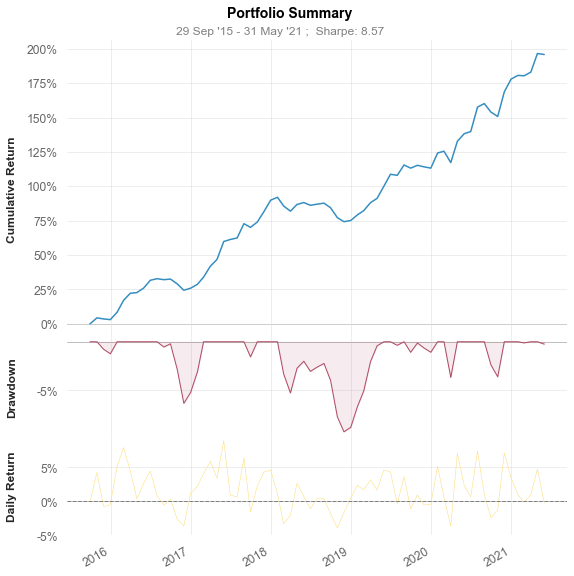

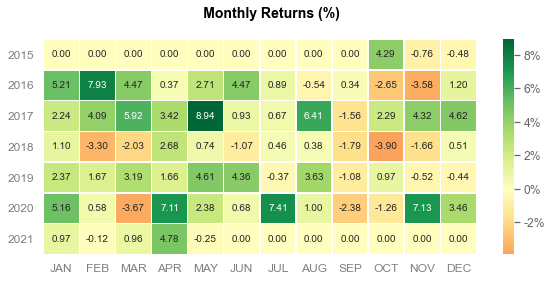

In [46]:
quantstats.reports.plots(df_port_return['Port4'], mode='basic')

In [47]:
quantstats.reports.metrics(df_port_return['Port4'], mode='full')

                           Strategy
-------------------------  ----------
Start Period               2015-09-30
End Period                 2021-05-31
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          195.82%
CAGR%                      21.08%
Sharpe                     8.65
Sortino                    23.52
Max Drawdown               -9.26%
Longest DD Days            457
Volatility (ann.)          47.43%
Calmar                     2.28
Skew                       0.37
Kurtosis                   -0.37

Expected Daily %           1.58%
Expected Monthly %         1.58%
Expected Yearly %          16.76%
Kelly Criterion            53.28%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.29%
Expected Shortfall (cVaR)  -3.29%

Payoff Ratio               1.95
Profit Factor              4.36
Common Sense Ratio         10.22
CPC Index                  5.88
Tail Ratio                 2.34
Outlier Win Ratio          2.72
Outlier Loss Ratio       